# Telecom chrun case study

### Problem Statement

In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.

 

For many incumbent operators, retaining high profitable customers is the number one business goal.

 

To reduce customer churn, **telecom companies need to predict which customers are at high risk of churn.**




#### Import necessery libraries:

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import IncrementalPCA
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from mpl_toolkits.mplot3d import Axes3D
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [2]:
 pd.read_excel('https://cdn.upgrad.com/UpGrad/temp/a625d1ee-b8d7-4edb-bdde-b1d82beaf5b4/Data+Dictionary-+Telecom+Churn+Case+Study.xlsx')

,Acronyms,Descriptions
0,MOBILE_NUMBER,Customer phone number
1,CIRCLE_ID,Telecom circle area to which the customer belo...
2,LOC,Local calls - within same telecom circle
3,STD,STD calls - outside the calling circle
4,IC,Incoming calls
5,OG,Outgoing calls
6,T2T,"Operator T to T, i.e. within same operator (mo..."
7,T2M,Operator T to other operator mobile
8,T2O,Operator T to other operator fixed line
9,T2F,Operator T to fixed lines of T


### Data understanding:

In [3]:
telecom_data = pd.read_csv('https://upgraddocs.s3.us-east-2.amazonaws.com/telecom_churn_data.csv')
telecom_data.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,...,0,1.0,1.0,1.0,NaN,968,30.4,0.0,101.20,3.58
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,...,0,NaN,1.0,1.0,NaN,1006,0.0,0.0,0.00,0.00
2,7001625959,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.690,...,0,NaN,NaN,NaN,1.0,1103,0.0,0.0,4.17,0.00
3,7001204172,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.338,...,0,NaN,NaN,NaN,NaN,2491,0.0,0.0,0.00,0.00
4,7000142493,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.636,...,0,0.0,NaN,NaN,NaN,1526,0.0,0.0,0.00,0.00


In [4]:
telecom_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


In [5]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(telecom_data.describe())

       mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  \
count   9.999900e+04    99999.0         98981.0         98981.0   
mean    7.001207e+09      109.0             0.0             0.0   
std     6.956694e+05        0.0             0.0             0.0   
min     7.000000e+09      109.0             0.0             0.0   
25%     7.000606e+09      109.0             0.0             0.0   
50%     7.001205e+09      109.0             0.0             0.0   
75%     7.001812e+09      109.0             0.0             0.0   
max     7.002411e+09      109.0             0.0             0.0   

       loc_ic_t2o_mou        arpu_6        arpu_7        arpu_8        arpu_9  \
count         98981.0  99999.000000  99999.000000  99999.000000  99999.000000   
mean              0.0    282.987358    278.536648    279.154731    261.645069   
std               0.0    328.439770    338.156291    344.474791    341.998630   
min               0.0  -2258.709000  -2014.045000   -945.808000  -1899.5

In [6]:
telecom_data.shape

(99999, 226)

In [7]:
def get_null_percentage(_data):
    with pd.option_context('display.max_rows', None, 'display.max_columns', None):
        return (_data.isnull().sum(axis=0)/_data.shape[0]).sort_values(ascending= False)

In [8]:
null_values_per = get_null_percentage(telecom_data)
null_values_per

count_rech_2g_6             0.748467
date_of_last_rech_data_6    0.748467
count_rech_3g_6             0.748467
av_rech_amt_data_6          0.748467
max_rech_data_6             0.748467
total_rech_data_6           0.748467
arpu_3g_6                   0.748467
arpu_2g_6                   0.748467
night_pck_user_6            0.748467
fb_user_6                   0.748467
arpu_3g_7                   0.744287
count_rech_2g_7             0.744287
fb_user_7                   0.744287
count_rech_3g_7             0.744287
arpu_2g_7                   0.744287
av_rech_amt_data_7          0.744287
max_rech_data_7             0.744287
night_pck_user_7            0.744287
total_rech_data_7           0.744287
date_of_last_rech_data_7    0.744287
night_pck_user_9            0.740777
date_of_last_rech_data_9    0.740777
fb_user_9                   0.740777
arpu_2g_9                   0.740777
max_rech_data_9             0.740777
arpu_3g_9                   0.740777
total_rech_data_9           0.740777
a

In [9]:
telecom_data['good_phase_recharge'] = telecom_data['total_rech_amt_6'] + telecom_data['total_rech_amt_7']

### Data preparation, Cleaning & Feature engineering:

In [10]:
seventy_percentile = int(telecom_data['good_phase_recharge'].quantile(.70))
telecom_data = telecom_data[(telecom_data.good_phase_recharge > seventy_percentile)]
telecom_data.shape

(29979, 227)

In [11]:
null_values_per = get_null_percentage(telecom_data)
null_values_per

count_rech_2g_6             0.620167
total_rech_data_6           0.620167
night_pck_user_6            0.620167
count_rech_3g_6             0.620167
date_of_last_rech_data_6    0.620167
arpu_2g_6                   0.620167
av_rech_amt_data_6          0.620167
fb_user_6                   0.620167
arpu_3g_6                   0.620167
max_rech_data_6             0.620167
arpu_2g_9                   0.618166
arpu_3g_9                   0.618166
date_of_last_rech_data_9    0.618166
total_rech_data_9           0.618166
night_pck_user_9            0.618166
av_rech_amt_data_9          0.618166
fb_user_9                   0.618166
count_rech_3g_9             0.618166
count_rech_2g_9             0.618166
max_rech_data_9             0.618166
total_rech_data_7           0.611328
max_rech_data_7             0.611328
arpu_3g_7                   0.611328
av_rech_amt_data_7          0.611328
arpu_2g_7                   0.611328
count_rech_3g_7             0.611328
night_pck_user_7            0.611328
c

In [12]:
filtered_columns = list(null_values_per[null_values_per < 0.6].index) 

In [13]:
filtered_data = telecom_data[filtered_columns]
filtered_data.head()

,loc_og_t2c_mou_9,loc_ic_t2t_mou_9,std_og_t2t_mou_9,std_ic_t2m_mou_9,std_ic_t2o_mou_9,std_ic_mou_9,loc_og_mou_9,loc_og_t2t_mou_9,loc_og_t2m_mou_9,ic_others_9,...,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,mobile_number
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,1580,790,1580,0,0,0,779,0,7000701601
8,0.0,4.03,7.33,13.53,0.0,13.53,60.71,26.13,34.58,0.00,...,186,90,154,30,36,50,0,10,0,7001524846
13,0.0,24.98,230.38,151.51,0.0,213.91,119.69,6.14,108.24,20.31,...,353,110,110,130,130,110,50,0,0,7002191713
16,0.0,50.23,4.46,29.58,0.0,46.24,233.04,26.88,201.49,0.00,...,220,110,110,130,220,100,100,130,220,7000875565
17,0.0,40.91,504.11,1.63,0.0,1.63,45.79,36.41,9.38,0.00,...,335,110,0,30,130,30,0,0,0,7000187447


In [14]:
get_null_percentage(filtered_data)

loc_og_t2c_mou_9        0.056806
loc_ic_t2m_mou_9        0.056806
std_og_t2m_mou_9        0.056806
og_others_9             0.056806
roam_ic_mou_9           0.056806
std_og_mou_9            0.056806
spl_og_mou_9            0.056806
std_og_t2c_mou_9        0.056806
offnet_mou_9            0.056806
std_og_t2f_mou_9        0.056806
isd_og_mou_9            0.056806
roam_og_mou_9           0.056806
std_ic_t2f_mou_9        0.056806
isd_ic_mou_9            0.056806
loc_ic_t2f_mou_9        0.056806
onnet_mou_9             0.056806
loc_og_t2f_mou_9        0.056806
loc_og_mou_9            0.056806
spl_ic_mou_9            0.056806
std_og_t2t_mou_9        0.056806
std_ic_t2m_mou_9        0.056806
std_ic_t2o_mou_9        0.056806
std_ic_mou_9            0.056806
loc_ic_t2t_mou_9        0.056806
loc_og_t2t_mou_9        0.056806
ic_others_9             0.056806
std_ic_t2t_mou_9        0.056806
loc_ic_mou_9            0.056806
loc_og_t2m_mou_9        0.056806
offnet_mou_8            0.031289
          

In [15]:
# filtered_data.apply(pd.value_counts)

filtered_data.describe()

,loc_og_t2c_mou_9,loc_ic_t2t_mou_9,std_og_t2t_mou_9,std_ic_t2m_mou_9,std_ic_t2o_mou_9,std_ic_mou_9,loc_og_mou_9,loc_og_t2t_mou_9,loc_og_t2m_mou_9,ic_others_9,...,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,mobile_number
count,28276.000000,28276.000000,28276.000000,28276.000000,28276.0,28276.000000,28276.000000,28276.000000,28276.000000,28276.000000,...,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,2.997900e+04
mean,1.509433,65.989633,162.399537,28.814624,0.0,46.553462,259.372681,85.652436,167.025693,1.414604,...,568.333133,171.471130,175.723006,162.929351,157.082158,104.558858,105.303379,95.677774,69.592381,7.001223e+09
std,6.431328,164.249075,393.494099,95.074234,0.0,133.415415,369.914537,233.913274,238.146158,14.542697,...,584.377933,174.762549,181.606909,172.671442,171.665424,142.819031,141.184108,145.319905,128.654161,6.846594e+05
min,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000e+09
25%,0.000000,7.580000,0.000000,0.050000,0.0,1.610000,40.040000,5.890000,23.337500,0.000000,...,260.000000,110.000000,110.000000,67.000000,50.000000,30.000000,27.000000,0.000000,0.000000,7.000641e+09
50%,0.000000,27.480000,6.010000,5.660000,0.0,12.230000,146.725000,28.460000,90.025000,0.000000,...,481.000000,120.000000,128.000000,130.000000,130.000000,110.000000,98.000000,50.000000,27.000000,7.001232e+09
75%,0.000000,69.710000,123.592500,24.415000,0.0,42.360000,344.172500,83.382500,218.810000,0.030000,...,750.000000,200.000000,200.000000,198.000000,179.000000,120.000000,130.000000,130.000000,130.000000,7.001814e+09
max,274.890000,7565.890000,7244.160000,5689.760000,0.0,5956.660000,11099.260000,10389.240000,4429.880000,919.630000,...,37235.000000,4010.000000,4010.000000,4449.000000,3399.000000,4010.000000,4010.000000,4449.000000,3399.000000,7.002411e+09


In [16]:
# std_og_t2c_mou_6
# std_ic_t2o_mou_6
# std_ic_t2o_mou_8
# std_og_t2c_mou_8
# std_og_t2c_mou_9
# std_ic_t2o_mou_9

# ===> Drop these columns as there is no change in the data overall
dropping_columns = [
    'std_og_t2c_mou_6', 'std_ic_t2o_mou_6', 'std_ic_t2o_mou_8',
    'std_og_t2c_mou_8', 'std_og_t2c_mou_9', 'std_ic_t2o_mou_9',
    'std_og_t2c_mou_7', 'std_ic_t2o_mou_7', 'loc_og_t2o_mou', 'std_og_t2o_mou',
    'loc_ic_t2o_mou', 'circle_id', 'mobile_number'
]
filtered_data = filtered_data.drop(columns=dropping_columns, axis=1)

In [17]:
filtered_data.describe()

,loc_og_t2c_mou_9,loc_ic_t2t_mou_9,std_og_t2t_mou_9,std_ic_t2m_mou_9,std_ic_mou_9,loc_og_mou_9,loc_og_t2t_mou_9,loc_og_t2m_mou_9,ic_others_9,std_ic_t2t_mou_9,...,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9
count,28276.000000,28276.000000,28276.000000,28276.000000,28276.000000,28276.000000,28276.000000,28276.000000,28276.000000,28276.000000,...,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000
mean,1.509433,65.989633,162.399537,28.814624,46.553462,259.372681,85.652436,167.025693,1.414604,14.846225,...,613.908403,568.333133,171.471130,175.723006,162.929351,157.082158,104.558858,105.303379,95.677774,69.592381
std,6.431328,164.249075,393.494099,95.074234,133.415415,369.914537,233.913274,238.146158,14.542697,71.632225,...,602.047678,584.377933,174.762549,181.606909,172.671442,171.665424,142.819031,141.184108,145.319905,128.654161
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,7.580000,0.000000,0.050000,1.610000,40.040000,5.890000,23.337500,0.000000,0.000000,...,309.000000,260.000000,110.000000,110.000000,67.000000,50.000000,30.000000,27.000000,0.000000,0.000000
50%,0.000000,27.480000,6.010000,5.660000,12.230000,146.725000,28.460000,90.025000,0.000000,0.550000,...,520.000000,481.000000,120.000000,128.000000,130.000000,130.000000,110.000000,98.000000,50.000000,27.000000
75%,0.000000,69.710000,123.592500,24.415000,42.360000,344.172500,83.382500,218.810000,0.030000,8.410000,...,790.000000,750.000000,200.000000,200.000000,198.000000,179.000000,120.000000,130.000000,130.000000,130.000000
max,274.890000,7565.890000,7244.160000,5689.760000,5956.660000,11099.260000,10389.240000,4429.880000,919.630000,3819.830000,...,45320.000000,37235.000000,4010.000000,4010.000000,4449.000000,3399.000000,4010.000000,4010.000000,4449.000000,3399.000000


In [18]:
filtered_data.roam_og_mou_9.fillna(0, inplace=True)

In [19]:
def is_churned(_x):
    if ((_x.total_ic_mou_9 == 0) & (_x.total_og_mou_9 == 0) & (_x.vol_2g_mb_9 == 0) & (_x.vol_3g_mb_9 == 0)):
        return 1
    else:
        return 0
filtered_data['churn'] = filtered_data.apply(is_churned, axis=1)

In [20]:
filtered_data.churn.value_counts()

0    27390
1     2589
Name: churn, dtype: int64

In [21]:
filtered_data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29979 entries, 7 to 99997
Data columns (total 175 columns):
loc_og_t2c_mou_9        float64
loc_ic_t2t_mou_9        float64
std_og_t2t_mou_9        float64
std_ic_t2m_mou_9        float64
std_ic_mou_9            float64
loc_og_mou_9            float64
loc_og_t2t_mou_9        float64
loc_og_t2m_mou_9        float64
ic_others_9             float64
std_ic_t2t_mou_9        float64
loc_ic_mou_9            float64
spl_ic_mou_9            float64
loc_og_t2f_mou_9        float64
loc_ic_t2m_mou_9        float64
loc_ic_t2f_mou_9        float64
isd_ic_mou_9            float64
std_ic_t2f_mou_9        float64
roam_og_mou_9           float64
isd_og_mou_9            float64
onnet_mou_9             float64
std_og_t2f_mou_9        float64
offnet_mou_9            float64
spl_og_mou_9            float64
std_og_mou_9            float64
roam_ic_mou_9           float64
og_others_9             float64
std_og_t2m_mou_9        float64
loc_og_t2c_mou_8        fl

In [22]:
# ===> Drop columns 'last_date_of_month_6', 'last_date_of_month_7' as it's same across all columns
filtered_data.drop(columns=['last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 'last_date_of_month_9'], axis=1, inplace=True)

In [23]:
def convert_to_datetime(_x, _columns):
    _x[_columns] = _x[_columns].apply(pd.to_datetime, format='%m/%d/%Y')
    return _x


_columns = [
     'date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_9', 'date_of_last_rech_8'
]
filtered_data[_columns] = convert_to_datetime(filtered_data[_columns], _columns)

/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3391: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


In [24]:
without9_columns = filtered_data.columns.drop(list(filtered_data.filter(regex='_9')))
filtered_data = filtered_data[without9_columns] 
filtered_columns = filtered_data.columns

In [25]:
filtered_data[(filtered_data.arpu_7 <= 0) & (filtered_data.arpu_8 <= 0)].churn.value_counts() 

1    107
0     10
Name: churn, dtype: int64

### EDA

##### Correlation: 

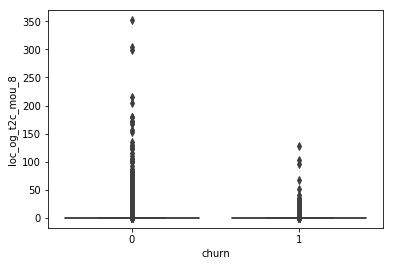

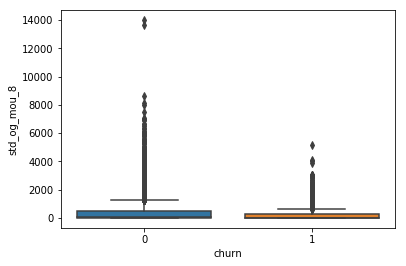

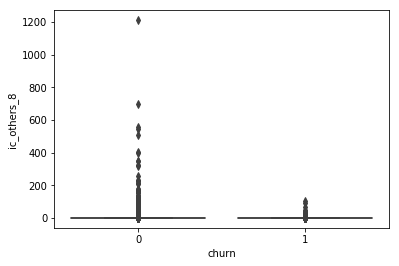

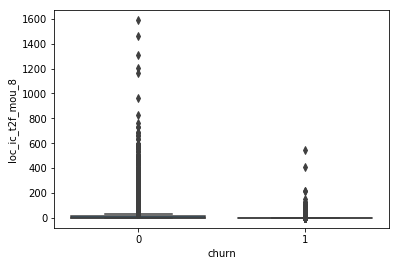

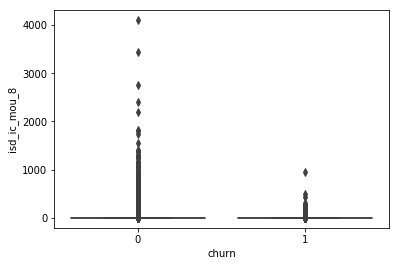

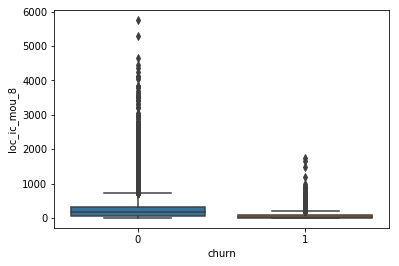

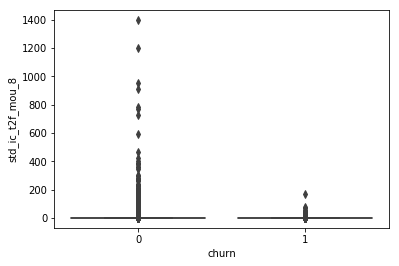

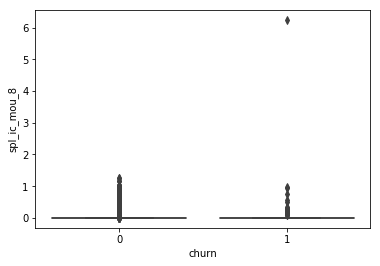

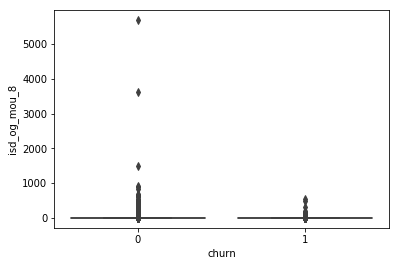

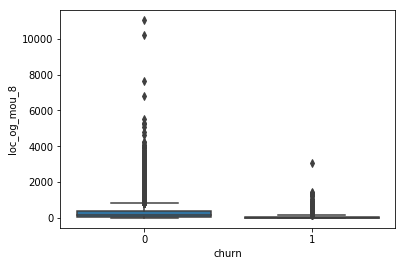

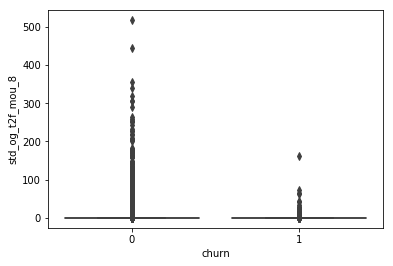

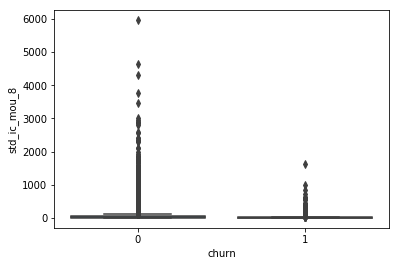

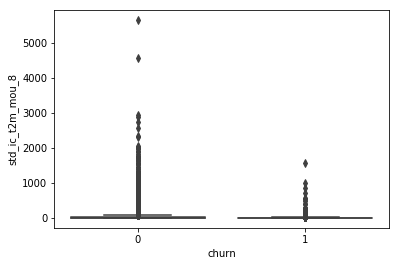

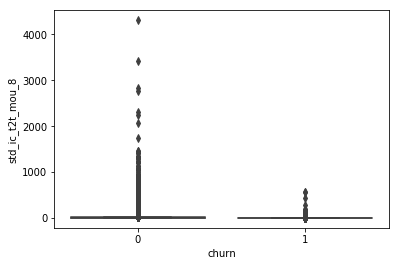

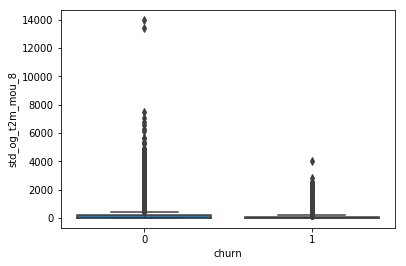

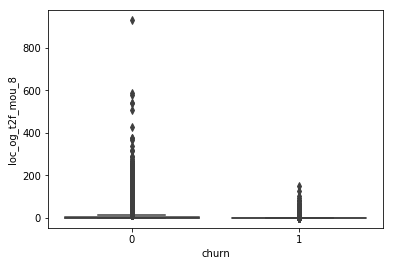

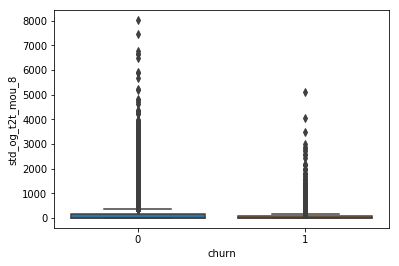

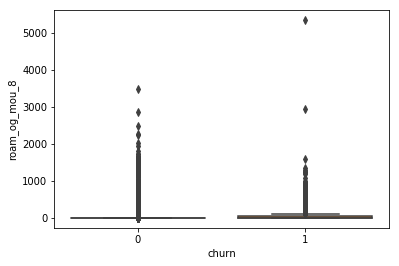

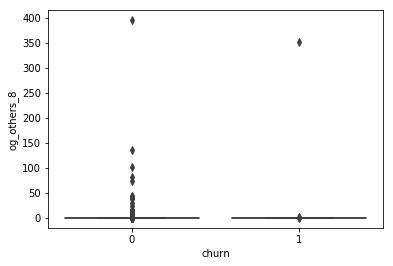

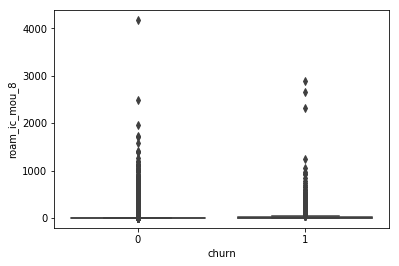

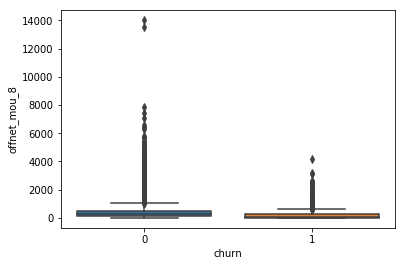

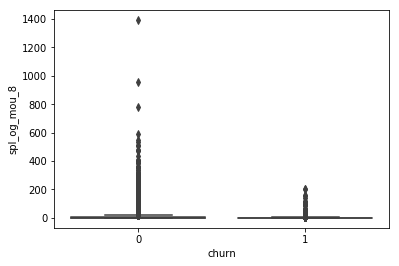

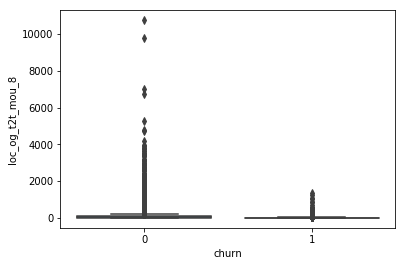

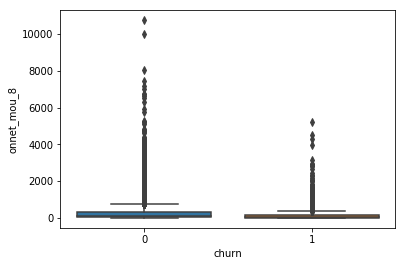

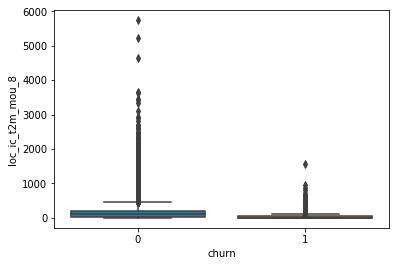

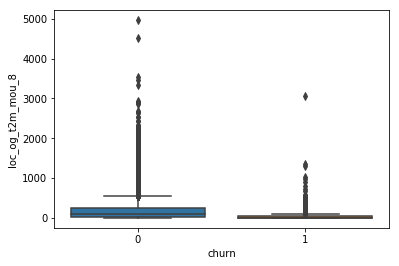

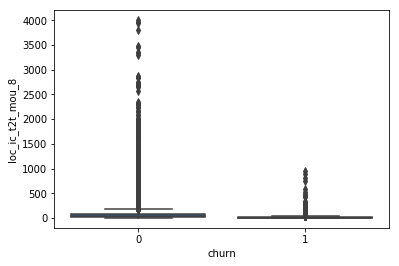

TypeError: ufunc add cannot use operands with types dtype('<M8[ns]') and dtype('<M8[ns]')

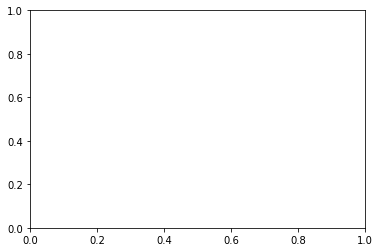

In [26]:
for _column in filtered_columns:
    plt.figure()
    sns.boxplot(y=_column, x='churn', data=filtered_data, orient='v')
    plt.show()

In [27]:
filtered_data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29979 entries, 7 to 99997
Data columns (total 130 columns):
loc_og_t2c_mou_8       float64
std_og_mou_8           float64
ic_others_8            float64
loc_ic_t2f_mou_8       float64
isd_ic_mou_8           float64
loc_ic_mou_8           float64
std_ic_t2f_mou_8       float64
spl_ic_mou_8           float64
isd_og_mou_8           float64
loc_og_mou_8           float64
std_og_t2f_mou_8       float64
std_ic_mou_8           float64
std_ic_t2m_mou_8       float64
std_ic_t2t_mou_8       float64
std_og_t2m_mou_8       float64
loc_og_t2f_mou_8       float64
std_og_t2t_mou_8       float64
roam_og_mou_8          float64
og_others_8            float64
roam_ic_mou_8          float64
offnet_mou_8           float64
spl_og_mou_8           float64
loc_og_t2t_mou_8       float64
onnet_mou_8            float64
loc_ic_t2m_mou_8       float64
loc_og_t2m_mou_8       float64
loc_ic_t2t_mou_8       float64
date_of_last_rech_8    datetime64[ns]
std_ic_t2f_mou_

#### Feature engineering: 

In [28]:
filtered_data.date_of_last_rech_7.dtype

dtype('<M8[ns]')

In [29]:
def filter_date_and_day(_data):
    for _column in _data.select_dtypes(include=['datetime64']).columns:
        _data[_column + '_year'] = _data[_column].dt.year 
        _data[_column + '_month'] = _data[_column].dt.month 
        _data[_column + '_day'] = _data[_column].dt.day
        _data.drop(columns=[_column], axis=1, inplace=True)
    return _data

filtered_data = filter_date_and_day(filtered_data)
filtered_data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29979 entries, 7 to 99997
Data columns (total 136 columns):
loc_og_t2c_mou_8             float64
std_og_mou_8                 float64
ic_others_8                  float64
loc_ic_t2f_mou_8             float64
isd_ic_mou_8                 float64
loc_ic_mou_8                 float64
std_ic_t2f_mou_8             float64
spl_ic_mou_8                 float64
isd_og_mou_8                 float64
loc_og_mou_8                 float64
std_og_t2f_mou_8             float64
std_ic_mou_8                 float64
std_ic_t2m_mou_8             float64
std_ic_t2t_mou_8             float64
std_og_t2m_mou_8             float64
loc_og_t2f_mou_8             float64
std_og_t2t_mou_8             float64
roam_og_mou_8                float64
og_others_8                  float64
roam_ic_mou_8                float64
offnet_mou_8                 float64
spl_og_mou_8                 float64
loc_og_t2t_mou_8             float64
onnet_mou_8                  float64
lo

In [30]:
filtered_data.select_dtypes(include=['datetime64']).columns

Index([], dtype='object')

In [31]:
# remove rows whose rows has null values more than 80
filtered_data = filtered_data[~(filtered_data.apply(lambda x: sum(x.isnull().values), axis = 1)> 80)]

In [32]:
filtered_data.shape

(29857, 136)

#### Standardise the data: 

In [33]:
filtered_data.dropna(inplace=True)

In [34]:
filtered_data.shape

(28455, 136)

In [35]:
qar = filtered_data['loc_og_t2m_mou_6'].quantile(1.0)
filtered_data[ filtered_data['onnet_mou_8'] < qar].shape

(28433, 136)

In [36]:
filtered_data.shape

(28455, 136)

In [37]:
def quantile_percentage(data):  
    quantile = pd.DataFrame(columns=['col', '10','50','85','90','95','99','100','max'])
    for col in data.columns:
        _tmp = data[col].quantile([0.1,0.5,0.85,0.9,0.95,0.99,1.0])
        quantile = quantile.append({'col': col, 
                                    '10': str(round(_tmp[0.1],2)), 
                                    '50': str(round(_tmp[0.5],2)),
                                    '85': str(round(_tmp[0.85],2)),
                                    '90': str(round(_tmp[0.9],2)),
                                    '95': str(round(_tmp[0.95],2)),
                                    '99': str(round(_tmp[0.99],2)),
                                    '100': str(round(_tmp[1.0],2)),
                                   'max':max(data[col])}, ignore_index=True)
    return quantile

pd.set_option('display.max_rows', 500)
quantile_percentage(filtered_data.select_dtypes([np.number]))

,col,10,50,85,90,95,99,100,max
0,loc_og_t2c_mou_8,0.0,0.0,2.28,4.68,9.68,29.33,351.83,351.830
1,std_og_mou_8,0.0,88.41,828.98,1076.1,1533.05,2803.41,13980.06,13980.060
2,ic_others_8,0.0,0.0,0.55,1.33,4.16,22.33,1209.86,1209.860
3,loc_ic_t2f_mou_8,0.0,2.16,25.23,38.74,69.69,192.47,1588.53,1588.530
4,isd_ic_mou_8,0.0,0.0,5.53,16.48,47.77,253.78,4100.38,4100.380
5,loc_ic_mou_8,15.62,152.04,445.67,563.23,782.08,1481.17,5748.81,5748.810
6,std_ic_t2f_mou_8,0.0,0.0,1.89,4.16,11.36,50.16,1394.89,1394.890
7,spl_ic_mou_8,0.0,0.0,0.0,0.0,0.25,0.61,6.23,6.230
8,isd_og_mou_8,0.0,0.0,0.0,0.0,0.57,31.58,5681.54,5681.540
9,loc_og_mou_8,8.26,159.61,514.33,645.97,898.3,1710.34,11039.91,11039.910


In [38]:
Q1 = filtered_data.quantile(0.05)
Q3 = filtered_data.quantile(0.99)
IQR = Q3 - Q1

filtered_data = filtered_data[~((filtered_data < (Q1 - 1.5 * IQR)) |(filtered_data > (Q3 + 1.5 * IQR))).any(axis=1)]
filtered_data.shape

(26097, 136)

In [39]:
X = filtered_data.drop(columns=['churn'], axis=1)
Y = filtered_data[['churn']]

scaler = StandardScaler()
_columns = X.columns
X[_columns] = scaler.fit_transform(X)
X.head()


,loc_og_t2c_mou_8,std_og_mou_8,ic_others_8,loc_ic_t2f_mou_8,isd_ic_mou_8,loc_ic_mou_8,std_ic_t2f_mou_8,spl_ic_mou_8,isd_og_mou_8,loc_og_mou_8,...,last_day_rch_amt_8,date_of_last_rech_8_year,date_of_last_rech_8_month,date_of_last_rech_8_day,date_of_last_rech_7_year,date_of_last_rech_7_month,date_of_last_rech_7_day,date_of_last_rech_6_year,date_of_last_rech_6_month,date_of_last_rech_6_day
7,-0.302985,-0.492982,4.494472,0.766521,0.710030,-0.161341,2.732913,-0.254652,3.052052,-0.013704,...,5.898054,0.0,0.0,-0.202467,0.0,0.0,-0.669380,0.0,0.0,0.013838
8,1.121965,-0.457462,-0.224994,-0.409092,-0.213957,-0.822051,-0.250384,-0.254652,-0.107967,-0.624203,...,-0.719165,0.0,0.0,0.601486,0.0,0.0,0.807731,0.0,0.0,-0.479508
16,-0.302985,-0.590834,-0.224994,0.563696,-0.207229,-0.070280,0.042439,-0.254652,-0.107967,-0.171626,...,0.313431,0.0,0.0,-2.614327,0.0,0.0,0.807731,0.0,0.0,0.753857
17,-0.302985,-0.628248,-0.224994,-0.409092,-0.213957,-0.882618,-0.250384,-0.254652,-0.107967,-0.823871,...,-0.805215,0.0,0.0,-0.403455,0.0,0.0,0.561546,0.0,0.0,0.753857
21,-0.302985,1.003128,-0.224994,-0.100096,-0.213957,-0.272309,-0.250384,-0.254652,-0.107967,-0.412944,...,-0.374967,0.0,0.0,0.802474,0.0,0.0,0.807731,0.0,0.0,0.753857


In [40]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=100)

In [41]:
x_train.head()

,loc_og_t2c_mou_8,std_og_mou_8,ic_others_8,loc_ic_t2f_mou_8,isd_ic_mou_8,loc_ic_mou_8,std_ic_t2f_mou_8,spl_ic_mou_8,isd_og_mou_8,loc_og_mou_8,...,last_day_rch_amt_8,date_of_last_rech_8_year,date_of_last_rech_8_month,date_of_last_rech_8_day,date_of_last_rech_7_year,date_of_last_rech_7_month,date_of_last_rech_7_day,date_of_last_rech_6_year,date_of_last_rech_6_month,date_of_last_rech_6_day
47738,-0.302985,-0.144877,-0.147064,-0.409092,-0.213957,-0.744952,-0.250384,-0.254652,-0.107967,-0.717734,...,0.313431,0.0,0.0,-0.202467,0.0,0.0,0.069176,0.0,0.0,0.507184
94170,-0.302985,-0.627848,-0.224994,0.082506,-0.213957,0.329599,0.230490,-0.254652,-0.107967,3.596554,...,0.313431,0.0,0.0,0.400498,0.0,0.0,-1.161751,0.0,0.0,-1.712872
66819,-0.107677,-0.628248,-0.224994,-0.379649,-0.213957,0.068690,-0.250384,-0.254652,-0.107967,-0.405659,...,-0.547066,0.0,0.0,-0.604444,0.0,0.0,0.807731,0.0,0.0,0.260511
33455,-0.302985,-0.246500,-0.224994,0.458714,-0.213957,-0.076225,0.728825,-0.254652,-0.107967,0.026837,...,-0.805215,0.0,0.0,0.802474,0.0,0.0,0.561546,0.0,0.0,0.013838
63323,-0.281062,-0.114780,-0.224994,-0.224705,-0.213957,-0.195095,-0.250384,3.606401,-0.107967,-0.537197,...,-0.374967,0.0,0.0,0.400498,0.0,0.0,0.807731,0.0,0.0,0.507184


### Modeling & Tuning:

In [42]:
pca = PCA(random_state=100, svd_solver='randomized')
pca.fit_transform(x_train)

array([[-4.20846761e+00, -5.74362777e-01, -7.90223186e-01, ...,
        -3.63473345e-16, -1.79144790e-16, -2.67285236e-16],
       [ 2.47880665e+00, -1.15042024e+00, -1.33185779e+00, ...,
        -1.97501663e-17,  4.12650855e-17,  6.27013584e-17],
       [-1.48833117e+00, -2.11557303e+00, -2.54176310e+00, ...,
        -1.78702814e-16, -2.31891849e-16, -2.20358914e-16],
       ...,
       [-1.88405674e+00, -1.78881820e+00, -1.01160406e+00, ...,
         1.59027488e-17, -2.18585249e-17, -6.52328688e-18],
       [ 6.20078989e-01, -2.65241685e+00,  2.09366458e+00, ...,
         3.03662574e-17, -2.85002020e-17, -3.01384347e-18],
       [ 3.14440639e+00,  1.45599512e+00, -5.95064012e-01, ...,
        -6.62909354e-18,  5.17407500e-17,  2.99671283e-17]])

In [43]:
pca.components_.round(4)

array([[ 6.000e-04, -4.910e-02,  2.580e-02, ..., -0.000e+00, -0.000e+00,
        -1.720e-02],
       [ 2.960e-02,  2.323e-01,  5.300e-03, ...,  0.000e+00,  0.000e+00,
         8.040e-02],
       [ 4.000e-04,  3.320e-02, -5.000e-04, ..., -0.000e+00, -0.000e+00,
        -7.490e-02],
       ...,
       [-0.000e+00,  0.000e+00, -0.000e+00, ..., -0.000e+00, -0.000e+00,
         0.000e+00],
       [ 0.000e+00,  0.000e+00,  0.000e+00, ...,  0.000e+00,  1.000e+00,
         0.000e+00],
       [-0.000e+00, -0.000e+00,  0.000e+00, ..., -1.000e+00, -0.000e+00,
        -0.000e+00]])

In [44]:
colnames = list(x_train.columns)
pcs_df = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1], 'Feature':colnames})
pcs_df.head(10)

,PC1,PC2,Feature
0,0.000573,0.029601,loc_og_t2c_mou_8
1,-0.049128,0.232251,std_og_mou_8
2,0.025829,0.005256,ic_others_8
3,0.109577,-0.041325,loc_ic_t2f_mou_8
4,0.028606,-0.002510,isd_ic_mou_8
5,0.211353,-0.028163,loc_ic_mou_8
6,0.058687,-0.024254,std_ic_t2f_mou_8
7,-0.021995,0.023470,spl_ic_mou_8
8,0.015242,-0.008680,isd_og_mou_8
9,0.195134,0.020288,loc_og_mou_8


In [45]:
pca.explained_variance_ratio_.round(4)

array([0.1117, 0.0947, 0.0565, 0.0453, 0.0381, 0.0378, 0.0282, 0.0266,
       0.0249, 0.0239, 0.0224, 0.0212, 0.0194, 0.0189, 0.0174, 0.0164,
       0.0144, 0.0137, 0.013 , 0.0125, 0.0117, 0.0114, 0.0108, 0.0102,
       0.0099, 0.0092, 0.0089, 0.0085, 0.0083, 0.0077, 0.0075, 0.0075,
       0.0074, 0.0071, 0.007 , 0.0069, 0.0065, 0.0065, 0.0064, 0.0062,
       0.0061, 0.006 , 0.0058, 0.0057, 0.0056, 0.0054, 0.0054, 0.0051,
       0.0049, 0.0048, 0.0046, 0.0044, 0.0043, 0.0041, 0.0041, 0.004 ,
       0.0039, 0.0038, 0.0035, 0.0035, 0.0034, 0.0033, 0.0033, 0.0033,
       0.0032, 0.0032, 0.003 , 0.0029, 0.0029, 0.0028, 0.0028, 0.0026,
       0.0026, 0.0025, 0.0025, 0.0024, 0.0022, 0.0021, 0.0021, 0.002 ,
       0.002 , 0.002 , 0.0019, 0.0019, 0.0018, 0.0018, 0.0017, 0.0016,
       0.0016, 0.0015, 0.0013, 0.0013, 0.0013, 0.001 , 0.0009, 0.0008,
       0.0008, 0.0007, 0.0006, 0.0004, 0.0004, 0.0002, 0.    , 0.    ,
       0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ,
      

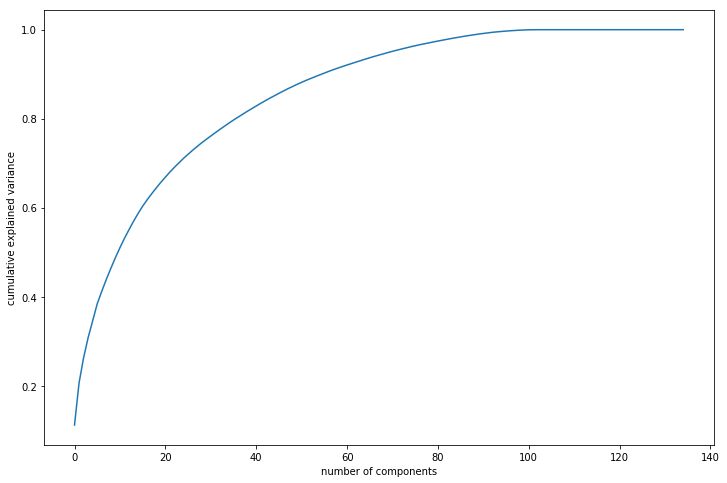

In [46]:
fig = plt.figure(figsize=(12, 8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

##### we try to make 85 components to describe 95% of the components

In [47]:
pca_final = IncrementalPCA(n_components=85)
df_train_pca = pca_final.fit_transform(x_train)
df_train_pca.shape

(18267, 85)

#### Check correlation: 

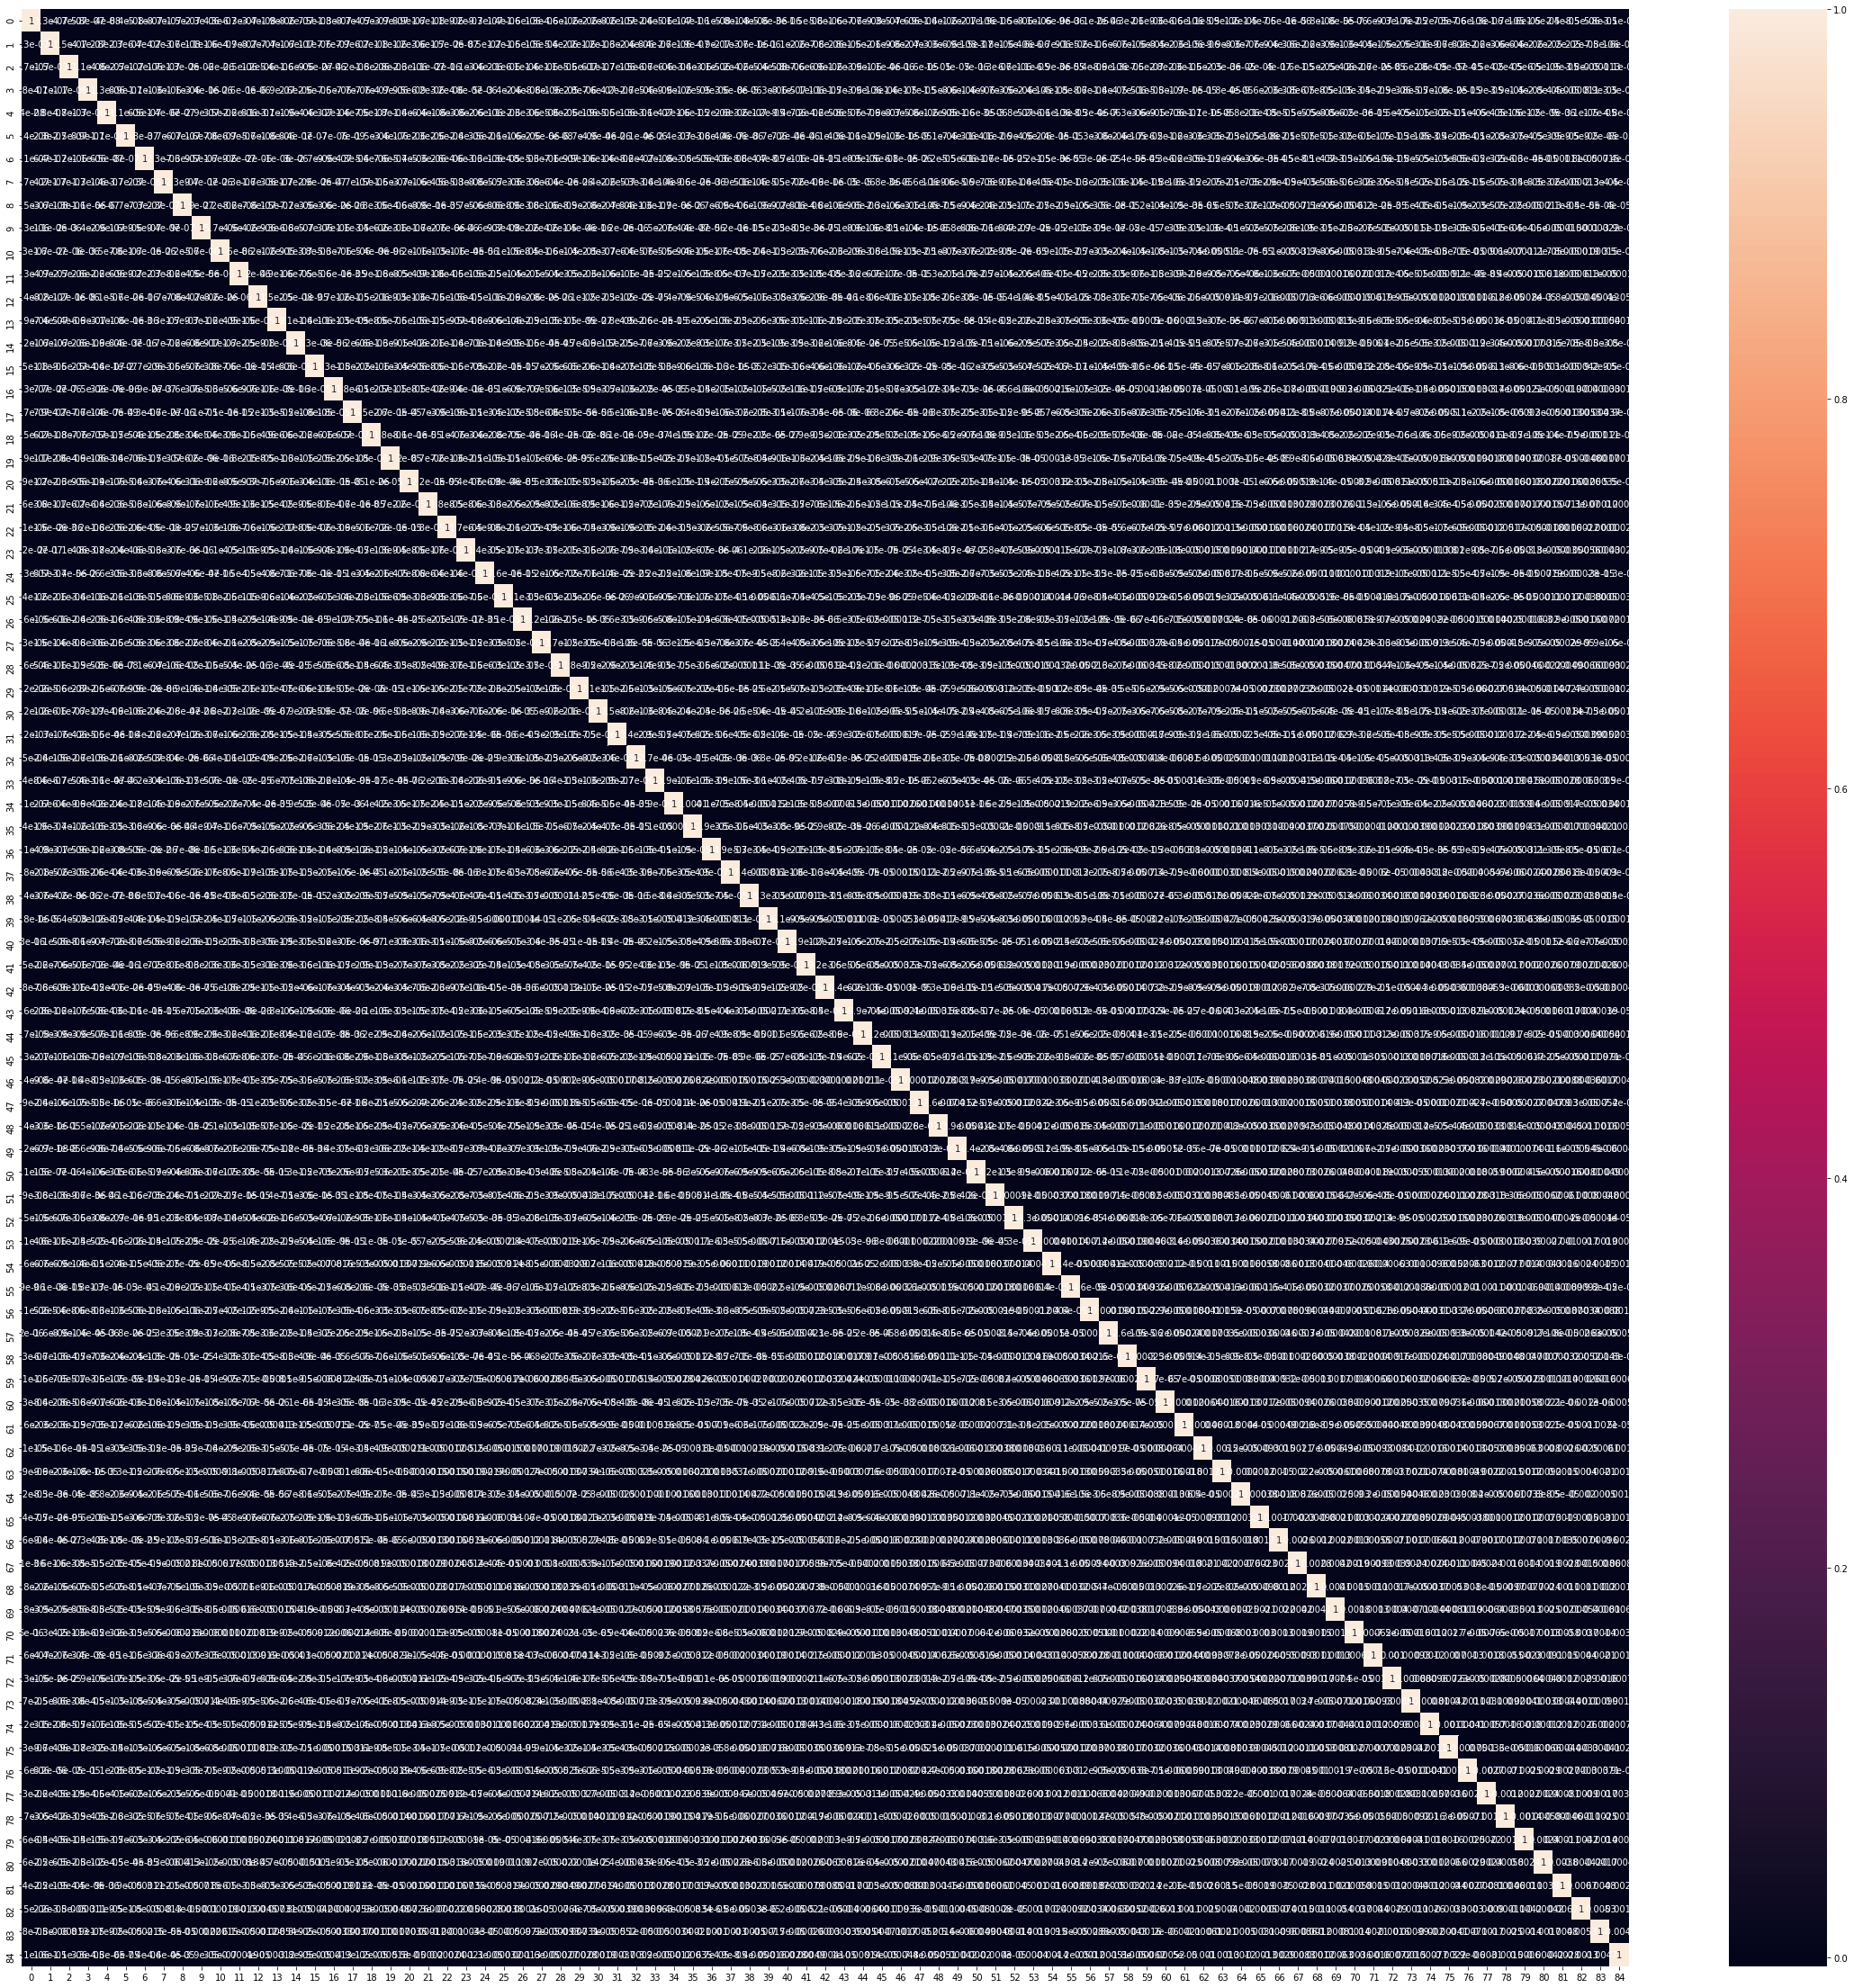

In [48]:
corrmat = np.corrcoef(df_train_pca.transpose())
plt.figure(figsize=(40, 40))
sns.heatmap(corrmat, annot=True)

#### There is no co-relation b/w the variables:

#### Transform the test data:

In [49]:
pca_test_data = pca_final.transform(x_test)

In [50]:
pca_test_data.shape

(7830, 85)

### Logistic regression with PCA:

In [51]:
logistic_regression = LogisticRegression()
logistic_model = logistic_regression.fit(df_train_pca, y_train)

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [52]:
predicted_proba = logistic_model.predict_proba(pca_test_data)[:, 1]

In [53]:
"{:2.2}".format(metrics.roc_auc_score(y_test, predicted_proba))

'0.89'

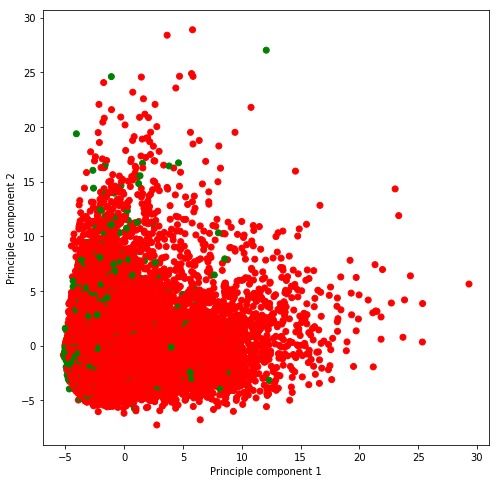

In [54]:
plt.figure(figsize=(8, 8))
plt.scatter(df_train_pca[:, 0], df_train_pca[:, 1], c= y_train['churn'].map({0: 'red', 1: 'green'}))
plt.xlabel('Principle component 1')
plt.ylabel('Principle component 2')
plt.show()

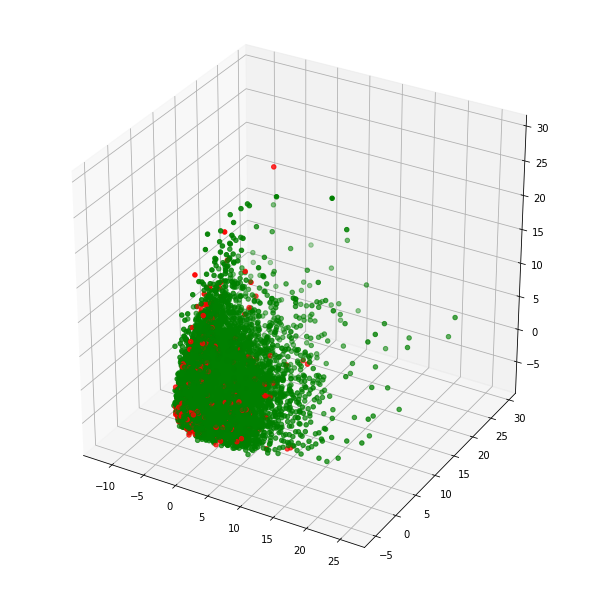

In [55]:
fig = plt.figure(figsize=(8,8))
ax = Axes3D(fig)
# ax = plt.axes(projection='3d')
ax.scatter(df_train_pca[:,2], df_train_pca[:,0], df_train_pca[:,1], c=y_train['churn'].map({0:'green',1:'red'}))

In [56]:
len(logistic_model.coef_[0])

85

In [57]:
len(colnames)

135

In [58]:
pca_column_frame = pcs_df.head(85)
pca_column_frame.head()

,PC1,PC2,Feature
0,0.000573,0.029601,loc_og_t2c_mou_8
1,-0.049128,0.232251,std_og_mou_8
2,0.025829,0.005256,ic_others_8
3,0.109577,-0.041325,loc_ic_t2f_mou_8
4,0.028606,-0.002510,isd_ic_mou_8


In [59]:
# result =  pd.DataFrame({'columns': colnames})
pca_column_frame['coeff'] = logistic_model.coef_[0]
pca_column_frame.sort_values(by=['coeff'])

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,PC1,PC2,Feature,coeff
31,-6.453963e-03,0.043588,og_others_6,-0.679507
30,4.203551e-02,0.037952,std_ic_t2m_mou_6,-0.583664
29,4.073316e-02,-0.019940,std_og_t2f_mou_6,-0.515825
0,5.725661e-04,0.029601,loc_og_t2c_mou_8,-0.424158
51,1.868267e-01,0.007290,loc_og_mou_6,-0.407480
38,2.052560e-01,-0.039395,loc_ic_mou_6,-0.326868
27,5.785834e-02,-0.025360,std_ic_t2f_mou_6,-0.263850
64,6.037164e-02,-0.025053,std_ic_t2f_mou_7,-0.259482
76,-3.149718e-02,0.179615,std_og_t2m_mou_7,-0.257886
84,1.276824e-01,0.176477,good_phase_recharge,-0.240114


## Random forest classifier with PCA:

In [60]:
rfc = RandomForestClassifier(n_jobs=-1, bootstrap=True,
                             max_depth=4,
                             min_samples_leaf=50, 
                             min_samples_split=50,
                             max_features=8,
                             n_estimators=60)
rfc.fit(df_train_pca,y_train)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=4, max_features=8, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=50, min_samples_split=50,
                       min_weight_fraction_leaf=0.0, n_estimators=60, n_jobs=-1,
                       oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [61]:
predictions = rfc.predict(pca_test_data)

In [62]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97      7345
           1       0.00      0.00      0.00       485

    accuracy                           0.94      7830
   macro avg       0.47      0.50      0.48      7830
weighted avg       0.88      0.94      0.91      7830



/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [63]:
accuracy_score(y_true=y_test, y_pred=predictions).round(2)

0.94

In [64]:
print(confusion_matrix(y_test, predictions))

[[7345    0]
 [ 485    0]]


In [65]:
predictions[:20]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int64)

In [66]:
predicted_proba[:10].round(3)

array([0.078, 0.017, 0.003, 0.04 , 0.197, 0.001, 0.006, 0.005, 0.375,
       0.004])

In [67]:
print(confusion_matrix(y_test, predictions))

[[7345    0]
 [ 485    0]]


In [68]:
metrics.roc_auc_score(y_test, predicted_proba)

0.8938822257935478

#### Observation:

**Though there is a accurasy of 94% it's not able to identify the churned users.**
**it's because of class imbalance**
**We will try to reduce the class imbalance using imblearn different techniques**

### Sampling :

In [69]:
import imblearn

Using TensorFlow backend.


In [70]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(return_indices=True)
x_rus, y_run, ind = rus.fit_sample(x_train, y_train)

In [71]:
x_rus.shape

(2232, 135)

In [72]:
y_run.sum()

1116

Note: There may be a chance of loosing the data with under sampling

### Over sampling: 

In [73]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(return_indices=True)

# x_ros, y_ros, ind = ros.fit_sample(x_train, y_train)
# x_test_ros, y_test_ros, ind = ros.fit_sample(x_test, y_test)

x_ros, y_ros, ind = ros.fit_sample(df_train_pca, y_train)
x_test_ros, y_test_ros, ind = ros.fit_sample(pca_test_data, y_test)

/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [74]:
x_ros.shape

(34302, 85)

In [75]:
y_ros.sum()

17151

In [76]:
def fit_random_forest(x_train_data, x_test_data, y_train_data, y_test_data):
    rf = RandomForestClassifier(n_jobs=-1,
                                bootstrap=True,
                                max_depth=4,
                                min_samples_leaf=50,
                                min_samples_split=50,
                                n_estimators=60)
    rf.fit(x_train_data, y_train_data)
    predictions = rf.predict(x_test_data)
    print(classification_report(y_test_data, predictions))
    print(accuracy_score(y_true=y_test_data, y_pred=predictions))
    print(confusion_matrix(y_test_data, predictions))
    return rf

In [77]:
rfe_algo = fit_random_forest(x_ros, x_test_ros, y_ros, y_test_ros)

              precision    recall  f1-score   support

           0       0.77      0.83      0.80      7345
           1       0.82      0.75      0.78      7345

    accuracy                           0.79     14690
   macro avg       0.79      0.79      0.79     14690
weighted avg       0.79      0.79      0.79     14690

0.7914908100748809
[[6127 1218]
 [1845 5500]]


**Observation: There is a overfit in the data set from the result we can see**

### Oversampling followed by under sampling:

In [78]:
from imblearn.combine import SMOTETomek
smt = SMOTETomek(ratio='auto')
x_smt_train, y_smt_train = smt.fit_sample(df_train_pca, y_train)
x_smt_test, y_smt_test = smt.fit_sample(pca_test_data, y_test)

/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [79]:
rfe_algo = fit_random_forest(x_smt_train, x_smt_test, y_smt_train, y_smt_test)

              precision    recall  f1-score   support

           0       0.82      0.84      0.83      7345
           1       0.84      0.81      0.83      7345

    accuracy                           0.83     14690
   macro avg       0.83      0.83      0.83     14690
weighted avg       0.83      0.83      0.83     14690

0.8281143635125936
[[6195 1150]
 [1375 5970]]


In [80]:
rfe_algo.feature_importances_.round(3)

array([0.185, 0.012, 0.011, 0.01 , 0.003, 0.003, 0.165, 0.061, 0.005,
       0.007, 0.008, 0.029, 0.012, 0.002, 0.029, 0.013, 0.   , 0.172,
       0.006, 0.018, 0.001, 0.001, 0.005, 0.035, 0.005, 0.007, 0.002,
       0.001, 0.007, 0.001, 0.05 , 0.002, 0.003, 0.   , 0.003, 0.003,
       0.002, 0.013, 0.004, 0.002, 0.   , 0.001, 0.008, 0.001, 0.003,
       0.001, 0.   , 0.   , 0.   , 0.   , 0.001, 0.015, 0.012, 0.002,
       0.001, 0.001, 0.   , 0.   , 0.   , 0.001, 0.021, 0.001, 0.001,
       0.001, 0.006, 0.   , 0.001, 0.   , 0.004, 0.   , 0.   , 0.   ,
       0.001, 0.   , 0.   , 0.   , 0.008, 0.002, 0.   , 0.   , 0.002,
       0.   , 0.   , 0.   , 0.003])

### Over sampling with under sampling with logistic regression: 

In [81]:
def fit_logistic_regression(x_train_data, x_test_data, y_train_data, y_test_data):
    log = LogisticRegression(random_state=True)
    log.fit(x_train_data, y_train_data)
    predicted_proba = log.predict_proba(x_test_data)[:,1]
    print(metrics.roc_auc_score(y_test_data, predicted_proba).round(3)*100)
    return log

In [82]:
log_alg = fit_logistic_regression(x_smt_train, x_smt_test, y_smt_train, y_smt_test)

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


91.5


In [83]:
_percentage = log_alg.predict_proba(x_smt_train)[:,1]

In [84]:
churn_predicted = pd.DataFrame({})
churn_predicted['ChurnProbability'] = _percentage
churn_predicted['y_train'] = y_smt_train
churn_predicted.head(10)

,ChurnProbability,y_train
0,6.488421e-01,0
1,2.191682e-02,0
2,6.412995e-01,0
3,1.653578e-01,0
4,9.547230e-02,0
5,3.523076e-09,0
6,6.285519e-02,0
7,1.013725e-01,0
8,6.115682e-01,0
9,1.629175e-01,0


In [85]:
log_alg.classes_

array([0, 1], dtype=int64)

In [86]:
probabilities = [i/10 for i in range(10) ]
cutoff = pd.DataFrame(columns=['prob', 'accuracy', 'sensitivity', 'specificity'])
for _prob in probabilities:
    churn_predicted[_prob] = churn_predicted.ChurnProbability.map(lambda x: 1 if x > _prob else 0)
    cm = metrics.confusion_matrix(churn_predicted.y_train, churn_predicted[_prob])
    print(cm)
    total = sum(sum(cm))
    _accuracy = round((cm[0, 0] + cm[1, 1])/total, 3)
    _sensitivity = round(cm[1,1] / (cm[1,0] + cm[1,1]), 3)
    _specificity = round(cm[0,0] / (cm[0,0] + cm[0,1]), 3)
    cutoff.loc[_prob] = [ _prob, _accuracy, _sensitivity,  _specificity ]
    
cutoff

[[    0 17150]
 [    0 17150]]
[[ 7291  9859]
 [  383 16767]]
[[ 9844  7306]
 [  684 16466]]
[[11662  5488]
 [ 1066 16084]]
[[13090  4060]
 [ 1644 15506]]
[[14194  2956]
 [ 2356 14794]]
[[15053  2097]
 [ 3200 13950]]
[[15716  1434]
 [ 4579 12571]]
[[16216   934]
 [ 7165  9985]]
[[16685   465]
 [12221  4929]]


,prob,accuracy,sensitivity,specificity
0.0,0.0,0.500,1.000,0.000
0.1,0.1,0.701,0.978,0.425
0.2,0.2,0.767,0.960,0.574
0.3,0.3,0.809,0.938,0.680
0.4,0.4,0.834,0.904,0.763
0.5,0.5,0.845,0.863,0.828
0.6,0.6,0.846,0.813,0.878
0.7,0.7,0.825,0.733,0.916
0.8,0.8,0.764,0.582,0.946
0.9,0.9,0.630,0.287,0.973


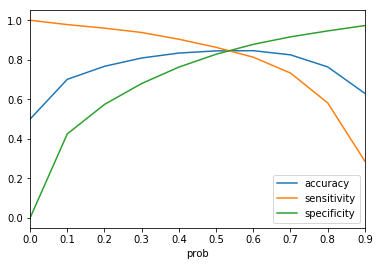

In [87]:
cutoff.plot.line(x='prob', y=['accuracy', 'sensitivity', 'specificity'])

In [88]:
_percentage

array([0.64884207, 0.02191682, 0.6412995 , ..., 0.99410716, 0.90357966,
       0.86029851])

In [89]:
_test_percentage = log_alg.predict_proba(x_smt_test)[:,1]
test_churn_predicted = pd.DataFrame({'ChurnProbability': log_alg.predict_proba(x_smt_test)[:,1]})
test_churn_predicted['y_test'] = y_smt_test
test_churn_predicted['0.55_predict'] = test_churn_predicted.ChurnProbability.map(lambda x: 1 if x > 0.55 else 0)
test_churn_predicted['0.65_predict'] = test_churn_predicted.ChurnProbability.map(lambda x: 1 if x > 0.65 else 0)
test_churn_predicted['0.60_predict'] = test_churn_predicted.ChurnProbability.map(lambda x: 1 if x > 0.6 else 0)
test_churn_predicted.head(10)

,ChurnProbability,y_test,0.55_predict,0.65_predict,0.60_predict
0,0.485543,0,0,0,0
1,0.146547,0,0,0,0
2,0.028947,0,0,0,0
3,0.410800,0,0,0,0
4,0.807323,0,1,1,1
5,0.002968,0,0,0,0
6,0.029920,0,0,0,0
7,0.126979,0,0,0,0
8,0.950525,1,1,1,1
9,0.030780,0,0,0,0


In [90]:
cm = metrics.confusion_matrix(test_churn_predicted.y_test, test_churn_predicted['0.65_predict'])
cm

array([[6597,  748],
       [1514, 5831]])

In [91]:
cm = metrics.confusion_matrix(test_churn_predicted.y_test, test_churn_predicted['0.60_predict'])
cm

array([[6461,  884],
       [1287, 6058]])

In [92]:
cm = metrics.confusion_matrix(test_churn_predicted.y_test, test_churn_predicted['0.55_predict'])
cm

array([[6283, 1062],
       [1078, 6267]])

##### **Has an accuracy of 91.5**

In [93]:
_percentage = log_alg.predict_proba(x_smt_test)[:,1]

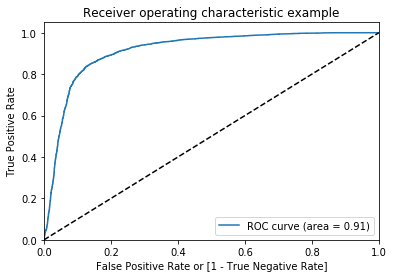

In [94]:
def draw_roc(actual, probability):
    fpr, tpr, thershoulds = metrics.roc_curve(actual, probability, drop_intermediate=False)
    auc = metrics.roc_auc_score(actual, probability)
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc)
    plt.plot([0,1], [0,1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()
    return None

draw_roc(y_smt_test, _percentage)


In [95]:
log_alg.coef_.round(2)

array([[-0.45,  0.04, -0.2 ,  0.04, -0.27,  0.09,  0.57, -0.21, -0.09,
        -0.1 , -0.  ,  0.11,  0.19, -0.01,  0.05,  0.06,  0.04,  0.71,
        -0.14,  0.03, -0.07, -0.13,  0.05,  0.28, -0.23, -0.22,  0.17,
        -0.34, -0.13, -0.68, -0.86, -0.95,  0.12,  0.16,  0.23,  0.08,
         0.28, -0.36, -0.4 ,  0.04,  0.16,  0.16,  0.55,  0.38, -0.  ,
        -0.04,  0.12, -0.17,  0.04,  0.15, -0.03, -0.66, -0.29,  0.08,
        -0.12, -0.26,  0.14, -0.06, -0.15,  0.01, -0.  ,  0.13, -0.05,
         0.13, -0.31,  0.04, -0.18, -0.01, -0.05, -0.09,  0.09, -0.01,
        -0.03,  0.17,  0.01, -0.02, -0.37,  0.36, -0.01,  0.02,  0.45,
         0.24, -0.11, -0.08, -0.41]])

In [96]:
pca_column_frame['sampling_coeff'] = log_alg.coef_[0]
pca_column_frame.iloc[(-np.abs(pca_column_frame['sampling_coeff'].values)).argsort()]

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,PC1,PC2,Feature,coeff,sampling_coeff
31,-6.453963e-03,0.043588,og_others_6,-0.679507,-0.953729
30,4.203551e-02,0.037952,std_ic_t2m_mou_6,-0.583664,-0.858902
17,-1.774574e-03,0.033143,roam_og_mou_8,0.554938,0.714890
29,4.073316e-02,-0.019940,std_og_t2f_mou_6,-0.515825,-0.683084
51,1.868267e-01,0.007290,loc_og_mou_6,-0.407480,-0.656833
6,5.868706e-02,-0.024254,std_ic_t2f_mou_8,0.475971,0.565560
42,1.684976e-01,0.000735,loc_og_t2m_mou_6,0.450837,0.551855
0,5.725661e-04,0.029601,loc_og_t2c_mou_8,-0.424158,-0.452175
80,1.356822e-01,-0.009677,loc_ic_t2t_mou_7,0.294770,0.447979
84,1.276824e-01,0.176477,good_phase_recharge,-0.240114,-0.409205


### Random Forest:

In [97]:
# x_smt_train, x_smt_test, y_smt_train, y_smt_test

model_rf = RandomForestClassifier(bootstrap=True,
                                  max_depth=10,
                                  min_samples_leaf=100, 
                                  min_samples_split=200,
                                  n_estimators=1000,
                                  oob_score = True, n_jobs = -1,
                                  random_state =50,
                                  max_features = 15,
                                  max_leaf_nodes = 30)
model_rf.fit(x_smt_train, y_smt_train)

# Make predictions
prediction_test = model_rf.predict(x_smt_test)

print(classification_report(y_smt_test,prediction_test))
print(confusion_matrix(y_smt_test,prediction_test))


              precision    recall  f1-score   support

           0       0.81      0.87      0.84      7345
           1       0.86      0.79      0.83      7345

    accuracy                           0.83     14690
   macro avg       0.83      0.83      0.83     14690
weighted avg       0.83      0.83      0.83     14690

[[6385  960]
 [1506 5839]]


In [98]:
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

In [99]:
r_model = RandomForestClassifier()
params = {
    'max_features': range(30, 40, 5),
    'n_estimators': [40],
    'min_samples_leaf': range(100, 150, 25),
    'min_samples_split': range(100, 150, 25),
    'max_depth': [7, 8, 9]
}

folds = KFold(n_splits=2, shuffle=True, random_state=101)
grid_cv1 = GridSearchCV(r_model,
                        param_grid=params,
                        scoring='accuracy',
                        n_jobs=-1,
                        cv=folds,
                        verbose=1,
                        return_train_score=True)
grid_cv1.fit(x_smt_train, y_smt_train)

Fitting 2 folds for each of 24 candidates, totalling 48 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 out of  48 | elapsed:  3.3min finished


GridSearchCV(cv=KFold(n_splits=2, random_state=101, shuffle=True),
             error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                    

In [100]:
results = pd.DataFrame(grid_cv1.cv_results_)
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,param_min_samples_leaf,param_min_samples_split,param_n_estimators,params,split0_test_score,split1_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,mean_train_score,std_train_score
0,13.562466,0.029134,0.089057,0.000699,7,30,100,100,40,"{'max_depth': 7, 'max_features': 30, 'min_samp...",0.846531,0.841050,0.843790,0.002741,5,0.851254,0.858134,0.854694,0.003440
1,13.485537,0.146570,0.093925,0.002441,7,30,100,125,40,"{'max_depth': 7, 'max_features': 30, 'min_samp...",0.847930,0.837551,0.842741,0.005190,8,0.852770,0.856443,0.854606,0.001837
2,14.372797,0.015926,0.098819,0.001076,7,30,125,100,40,"{'max_depth': 7, 'max_features': 30, 'min_samp...",0.840875,0.831778,0.836327,0.004548,24,0.845306,0.850612,0.847959,0.002653
3,14.383786,0.025026,0.088321,0.001697,7,30,125,125,40,"{'max_depth': 7, 'max_features': 30, 'min_samp...",0.841399,0.836327,0.838863,0.002536,18,0.845714,0.853878,0.849796,0.004082
4,16.601288,0.020170,0.093601,0.007934,7,35,100,100,40,"{'max_depth': 7, 'max_features': 35, 'min_samp...",0.844140,0.835743,0.839942,0.004198,16,0.849446,0.853411,0.851429,0.001983
5,16.864588,0.007049,0.101356,0.004684,7,35,100,125,40,"{'max_depth': 7, 'max_features': 35, 'min_samp...",0.843032,0.838950,0.840991,0.002041,11,0.851312,0.856851,0.854082,0.002770
6,15.733506,0.057019,0.088408,0.004809,7,35,125,100,40,"{'max_depth': 7, 'max_features': 35, 'min_samp...",0.840292,0.835685,0.837988,0.002303,20,0.842974,0.852070,0.847522,0.004548
7,15.503590,0.061074,0.093852,0.005581,7,35,125,125,40,"{'max_depth': 7, 'max_features': 35, 'min_samp...",0.841749,0.834985,0.838367,0.003382,19,0.844665,0.852245,0.848455,0.003790
8,14.881386,0.146135,0.102568,0.019191,8,30,100,100,40,"{'max_depth': 8, 'max_features': 30, 'min_samp...",0.843615,0.840525,0.842070,0.001545,10,0.851953,0.858892,0.855423,0.003469
9,14.855939,0.013882,0.121064,0.014724,8,30,100,125,40,"{'max_depth': 8, 'max_features': 30, 'min_samp...",0.850496,0.837901,0.844198,0.006297,2,0.857143,0.858426,0.857784,0.000641


In [101]:
grid_cv1.best_params_

{'max_depth': 9,
 'max_features': 35,
 'min_samples_leaf': 100,
 'min_samples_split': 100,
 'n_estimators': 40}

In [102]:
best_estimator = grid_cv1.best_estimator_

In [103]:
best_estimator.fit(x_smt_train, y_smt_train)

# Make predictions
prediction_test = best_estimator.predict(x_smt_test)

print(classification_report(y_smt_test,prediction_test))
print(confusion_matrix(y_smt_test,prediction_test))


              precision    recall  f1-score   support

           0       0.81      0.88      0.84      7345
           1       0.86      0.79      0.83      7345

    accuracy                           0.83     14690
   macro avg       0.84      0.83      0.83     14690
weighted avg       0.84      0.83      0.83     14690

[[6428  917]
 [1532 5813]]


In [104]:
best_estimator.feature_importances_.round(3)

array([0.207, 0.01 , 0.009, 0.004, 0.003, 0.003, 0.313, 0.029, 0.001,
       0.009, 0.002, 0.005, 0.005, 0.001, 0.009, 0.002, 0.001, 0.177,
       0.008, 0.009, 0.001, 0.001, 0.002, 0.004, 0.001, 0.003, 0.001,
       0.   , 0.002, 0.006, 0.014, 0.007, 0.002, 0.001, 0.002, 0.002,
       0.003, 0.007, 0.002, 0.001, 0.002, 0.005, 0.005, 0.001, 0.001,
       0.001, 0.002, 0.002, 0.001, 0.001, 0.002, 0.014, 0.02 , 0.001,
       0.005, 0.003, 0.001, 0.001, 0.001, 0.002, 0.015, 0.002, 0.002,
       0.001, 0.002, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.   ,
       0.001, 0.001, 0.001, 0.001, 0.004, 0.013, 0.001, 0.001, 0.005,
       0.002, 0.001, 0.001, 0.001])

### Observation: 

### **From the observation we can see that PCA with Logistic regression has balanced specificity and recall**

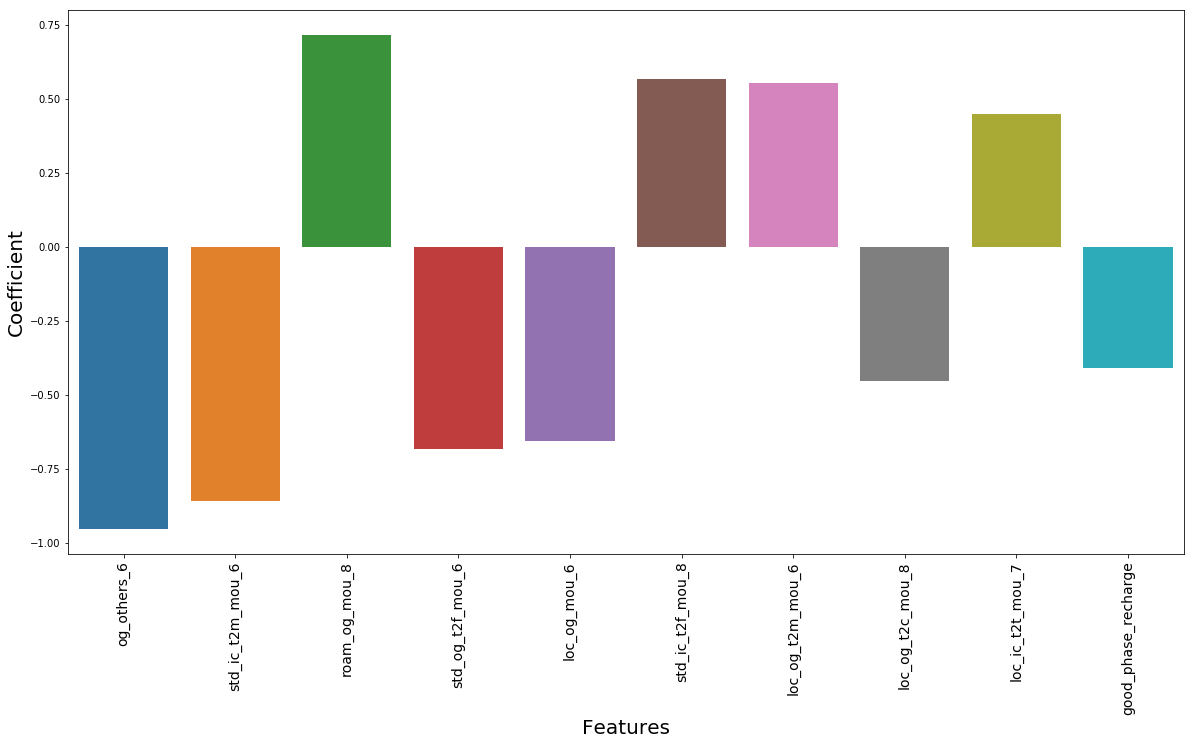

In [105]:
pca_column_frame

plt.figure(figsize=(20, 10))
top_10_features = pca_column_frame.iloc[(-np.abs(pca_column_frame['sampling_coeff'].values)).argsort()].head(10)
sns.barplot(x='Feature', y='sampling_coeff', data=top_10_features)
plt.xlabel('Features', size=20)
plt.ylabel('Coefficient', size=20)
plt.xticks(size = 14, rotation='vertical')
plt.show()

#### From the below observations we can derive the top features that can impact the churn: 

* Outgoing others
* Roaming outgoing minutes of usage
* local outgoing minutes of usage
* STD outgoing Operator T to fixed lines of T
* STD incoming Operator T to fixed lines of T